<a href="https://colab.research.google.com/github/CHELVYN01/Tugas-python-USD/blob/main/Pengenalan%20Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
import cv2 as cv
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import urllib.request as url

#Praktikum CMYK

#Konversi

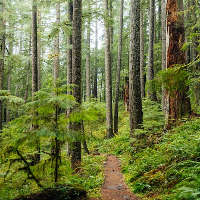

In [ ]:
link = "https://images.unsplash.com/photo-1662401208927-0b71a8635a84?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=464&q=80"

img =url.urlopen(link)

# convert to numpy array
img = np.asarray(bytearray(img.read()), dtype="uint8")

gambar = cv.imdecode(img,1)
gambar = cv.resize(gambar, (200,200))
cv2_imshow(gambar)


In [ ]:
def count(nilai):
    return 255 - nilai

In [ ]:
def toCMYK(image):
  u = 0.5
  b = 1

  tinggi = image.shape[0]
  lebar = image.shape[1]

  img = np.zeros([tinggi, lebar, 4], np.uint8)

  for y in range(tinggi) :
    for x in range(lebar):
      R = float(image[y,x,2])
      G = float(image[y,x,1])
      B = float(image[y,x,0])
      kp = min(count(R),count(G),count(B))
      if kp == 255:
        img[y,x] = [0,0,0,0]
      else:
        img[y,x] = [count(R)-u*kp,count(G)-u*kp,count(B)-u*kp,b*kp]
        img[y,x].astype(np.uint8)
  return img


In [ ]:
cmyk = toCMYK(gambar)
s = Image.fromarray(cmyk,"CMYK")
s.save("/content/drive/MyDrive/USD /Citra/image/hutan2.jpg")

In [ ]:
def rerata(img):
  height, width = img.shape[0],img.shape[1]

  Pred = []
  Pgreen = []
  Pblue = []
  for y in range(height):
    red = []
    green = []
    blue = []
    for x in range(width):
      red.append(img[y,x,2])
      green.append(img[y,x,1])
      blue.append(img[y,x,0])
    Pred.append(sum(red))
    Pgreen.append(sum(green))
    Pblue.append(sum(blue))

  R = (1/(height*width))*sum(Pred)
  G = (1/(height*width))*sum(Pgreen)
  B = (1/(height*width))*sum(Pblue)

  return [R,G,B]

In [ ]:
rata = rerata(gambar)
print(rata)

[110.4796, 118.62795000000001, 66.17245]


In [ ]:
def varians(img):
  mean = rerata(gambar)
  height, width = img.shape[0],img.shape[1]

  Pred = []
  Pgreen = []
  Pblue = []
  for y in range(height):
    red = []
    green = []
    blue = []
    for x in range(width):
      red.append(np.square(img[y,x,2] - mean[0]))
      green.append(np.square(img[y,x,1] - mean[1]))
      blue.append(np.square(img[y,x,0] - mean[2]))
    Pred.append(sum(red))
    Pgreen.append(sum(green))
    Pblue.append(sum(blue))

  R = np.sqrt((1/(height*width))*sum(Pred))
  G = np.sqrt((1/(height*width))*sum(Pgreen))
  B = np.sqrt((1/(height*width))*sum(Pblue))

  return [R,G,B]

In [ ]:
varians = varians(gambar)
print(varians)

[48.83262827086006, 51.19289187765721, 53.29335334727493]


In [ ]:
def skewness(img):
  mean = rerata(img)
  height, width = img.shape[0],img.shape[1]

  Pred = []
  Pgreen = []
  Pblue = []

  sDevRed = img[...,2].flatten()
  sDevGreen = img[...,1].flatten()
  sDevBlue = img[...,0].flatten()

  for y in range(height):
    red = []
    green = []
    blue = []

    for x in range(width):
      red.append(pow((img[y,x,2] - mean[0]),3))
      green.append(pow((img[y,x,1] - mean[1]),3))
      blue.append(pow((img[y,x,0] - mean[2]),3))

    Pred.append(sum(red))
    Pgreen.append(sum(green))
    Pblue.append(sum(blue))

  R = sum(Pred)/(height*width*pow(pstdev(sDevRed),3))
  G = sum(Pgreen)/(height*width*pow(pstdev(sDevGreen),3))
  B = sum(Pblue)/(height*width*pow(pstdev(sDevBlue),3))

  return [R,G,B]

In [ ]:
def pstdev(matrix):
  mean = np.mean(matrix)
  data = np.sqrt(sum(pow((matrix-mean),2))/len(matrix))
  return data

In [ ]:
skew = skewness(gambar)
result = []
for x in skew :
  if x < 0:
    result.append("Condong Kiri")
  elif x > 0:
    result.append("Condong Kanan")
  else:
    result.append("Tengah")

print(skew)
print(result)

[0.17520623555178347, 0.021388433181810194, 1.1044039616150871]
['Condong Kanan', 'Condong Kanan', 'Condong Kanan']


In [ ]:
def kurtosis(img):
  mean = rerata(img)
  height, width = img.shape[0],img.shape[1]

  Pred = []
  Pgreen = []
  Pblue = []

  sDevRed = img[...,2].flatten()
  sDevGreen = img[...,1].flatten()
  sDevBlue = img[...,0].flatten()

  for y in range(height):
    red = []
    green = []
    blue = []

    for x in range(width):
      red.append(pow((img[y,x,2] - mean[0]),4))
      green.append(pow((img[y,x,1] - mean[1]),4))
      blue.append(pow((img[y,x,0] - mean[2]),4))

    Pred.append(sum(red))
    Pgreen.append(sum(green))
    Pblue.append(sum(blue))

  R = sum(Pred)/(height*width*pow(pstdev(sDevRed),4)) -3
  G = sum(Pgreen)/(height*width*pow(pstdev(sDevGreen),4)) - 3
  B = sum(Pblue)/(height*width*pow(pstdev(sDevBlue),4)) - 3

  return [R,G,B]

In [ ]:
kurtosis = kurtosis(gambar)
result = []
for x in kurtosis :
  if x < 0:
    result.append("Distribusi Datar")
  elif x > 0:
    result.append("Distribusi Lancip")
  else:
    result.append("Distribusi Normal")

print(kurtosis)
print(result)

[-0.3128131071630378, -0.39460074410534807, 0.9413024421801928]
['Distribusi Datar', 'Distribusi Datar', 'Distribusi Lancip']


In [ ]:
image = np.array(gambar)

# Create float
bgr = image.astype(float)/255.

# Extract channels
u = 0.5
b = 1
# with np.errstate(invalid='ignore', divide='ignore'):
Kp = np.min(1-bgr, axis=2)
C = (1-bgr[...,2] - u*Kp)
M = (1-bgr[...,1] - u*Kp)
Y = (1-bgr[...,0] - u*Kp)
# Convert the input BGR image to CMYK colorspace
CMYK = (np.dstack((C,M,Y,b*Kp)) * 255).astype(np.uint8)
s = Image.fromarray(CMYK,"CMYK")
s.save("/content/drive/MyDrive/USD /Citra/image/hutanCMY.jpg")